![title](header.png)

We've looked at Hypothesis testing and ANOVA, which can give us insights into continuous data that's categorically split. What if we have two continuous variables and we want to see the relationship between the two? We need to use regression. Regression using statistical libraries like scipy and statsmodels is different to scikit-learn's method due to the output being used for different things. Statistical libraries will output more analytical data and summary statistics, whereas scikit-learn's methodology is more about making a working model for predictions. By the end of this guide you should be comfortable with applying basic linear regression models to your own data.

## Regression using Scipy

As with ANOVA, scipy gives us an easy way to come up with simple linear regression models at the price of having less customisation and output options. Let's look at an example of when we'd use regression analysis.

First let's import all the libraries and data we'll be using:

In [86]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

testData = pd.read_csv("testData.csv")

Now let's look at our test data:

      x data      y data
0  10.262790   97.858634
1  54.042887  373.536304
2  24.821802  120.470881
3  30.117078  242.484869
4  59.304158  335.920346


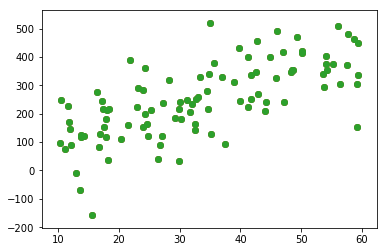

In [30]:
print(testData.head())

plt.scatter(testData['x data'], testData['y data'])
plt.show()

We can see here a general upward trend of our data - but how can we statistically analyse it? The <i>linregress</i> function under the scipy.stats library is the function we need:

In [33]:
print(stats.linregress(x,y))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) #Storing the output values for later use

LinregressResult(slope=6.1914361788023147, intercept=43.146485599323341, rvalue=0.6912805901775535, pvalue=1.7066342530959711e-15, stderr=0.65375315815832835)


Here we get a load of ourputs - the <i>slope</i> and the <i>intercept</i> correspond to the line of best fit we're interested in. In fact, if we get a little clever with matplotlib, we can plot the datapoints and the line on the same graph:

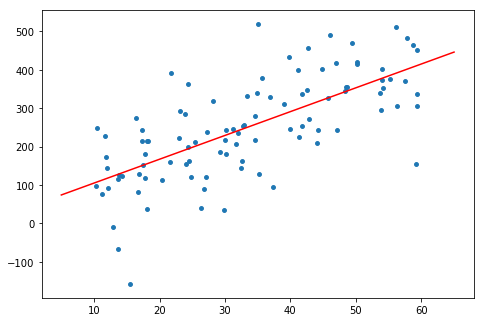

In [57]:
xfit = np.linspace(5, 65, 101)
yfit = slope * xfit + intercept  #Equation of fitted line

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(xfit, yfit, color="red") #Plot fitted line
ax.scatter(x,y, s=15) #Plot data again

plt.show()

Great - we have the most important parts of our analysis - the model, but how useful is the model? The r_value will give us some insight:

In [58]:
print(r_value ** 2) #Prints the R-Squared value

0.477868854356


The R-Squared value is a measure of how well our model fits the data - it goes between 0 and 100%, so 0.47 means we <i>might</i> have problems with our model (i.e, it might not be linear!). In reality, it depends on the test we're trying to do. Psychology data for example typically has smaller R-Squared values than chemical data as humans are harder to predict than particles. You need to use your statistical experience to tell if this value is <i>actually</i> small.

The p_value is the p-value for a hypothesis test with null hypothesis of the slope being equal to zero. In other words, this is the p-value for the data being related to some extent (if they weren't, we'd expect our slope to be around zero!). Here our p-value is very small, so we can say with confidence that our two variables are related.

Finally, stderr is the standard error of the estimate. This gives us an idea about how "wide" the data is spread - i.e if we put a number into the model, what the standard error we can expect is.

## Regression using Statsmodels

As with ANOVA, statsmodels gives us far more control over what we're doing with linear regression, and lets us move to regression with more than one factor. For example, take the data below:

   measurement     x data     y data     z data
0   162.067984  52.893388  48.853263  25.191883
1   229.634127   3.391961   5.694731  76.401828
2   157.195925  38.324961  23.015755  30.632007
3   203.279546  21.297441  17.965501  51.450576
4   260.999635   6.619755  47.818250  62.471135


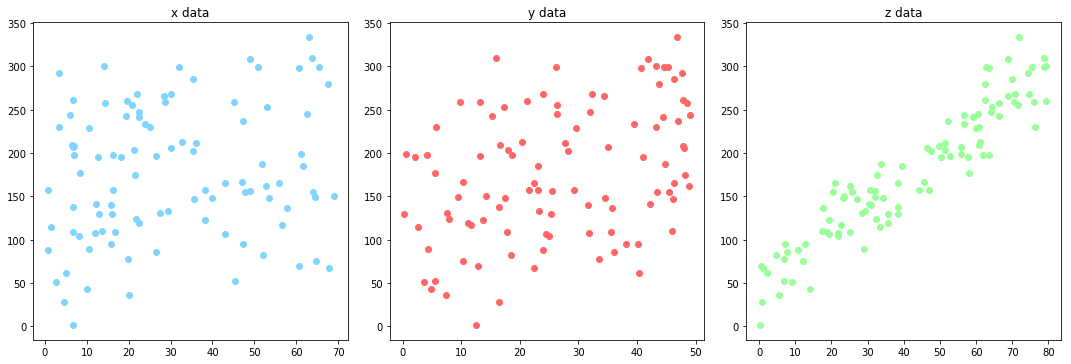

In [95]:
multReg = pd.read_csv("multiple.csv")

print(multReg.head())


#Graphing our data

fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5) #Sneaky way of increasing the size of our plot for readablity
plt.tight_layout()

ax[0].scatter(multReg['x data'], multReg['measurement'], color = "#80d4ff")
ax[1].scatter(multReg['y data'], multReg['measurement'], color = "#ff6666")
ax[2].scatter(multReg['z data'], multReg['measurement'], color = "#99ff99")

ax[0].set_title("x data")
ax[1].set_title("y data")
ax[2].set_title("z data")

plt.show()

Here we can make some simple observations - it looks obvious that our z-data has some correlation with our measurement, but for our y and x data it's very unclear. We need a statistical model!

In [99]:
y = multReg["measurement"] #Dependent variable
x = multReg[["x data", "y data", "z data"]] #Independent variables
#x = sm.add_constant(x) #Typically we expect a non-0 y-intercept, this line deals with that.

model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            measurement   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.095e+04
Date:                Tue, 27 Jun 2017   Prob (F-statistic):          1.36e-122
Time:                        11:38:53   Log-Likelihood:                -376.22
No. Observations:                 100   AIC:                             758.4
Df Residuals:                      97   BIC:                             766.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x data         0.6976      0.045     15.445      0.0

That's a lot of outputs! The most important ones to look at are the Prob(F-statistic), the R-Squared, the coef column, and the P>|t| column.

The Prob(F-statistic) gives us the p-value corresponding to the null hypotheis of <i>all</i> slopes/coefficients being equal to 0. The R-Squared gives us an idea of how helpful out model is as before.

The coeff column gives us an indication of what coefficient is associated with each variable, and the P>|t| gives us a p-value for the null hypothesis of the coefficient being equal to 0. To test this out more visually, we can graph the points of the measured data versus the variables with their associated coefficients:

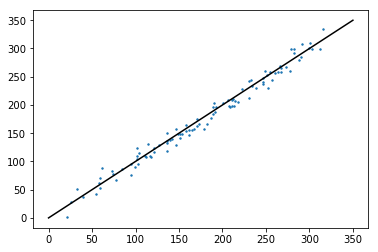

In [114]:
x = 0.7  * multReg['x data'] + 1.2  * multReg['y data'] + 3 * multReg['z data']
y = multReg['measurement']

#We expect x to equal y, plus or minus a CONSTANT amount

dummy = np.linspace(0,350, 100)

fig, ax = plt.subplots()

ax.scatter(x,y, s=2)
ax.plot(dummy, dummy, color="black") #The line x = y

plt.show()

That looks pretty good! If the variable x and y are equal it means we've found the right coefficients for the data, and our model is complete.

## Mini Project

Below we have some data and we want to see if it's linearly correlated. Try performing a linear regression test and interpret the results:

In [149]:
projectData = pd.read_csv("project.csv")

print(projectData.head())

            x            y
0  421.210608  5560.364046
1  421.504662  5228.252219
2  394.042457  5255.783030
3  406.042636  5969.146412
4  346.577200  9788.628920
